In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
data = pd.read_csv('complt_data_proc.csv', encoding='cp949')

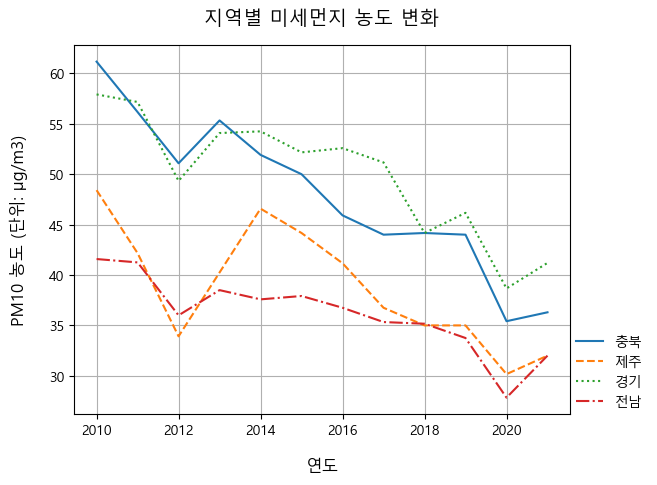

In [4]:
# 그래프 제목
plt.title('지역별 미세먼지 농도 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# 지역별 미먼
plt.plot(data.groupby(['시도명']).get_group('충북')['연도'], data.groupby(['시도명']).get_group('충북')['PM10 농도'], label='충북', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('제주')['연도'], data.groupby(['시도명']).get_group('제주')['PM10 농도'], label='제주', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('경기')['연도'], data.groupby(['시도명']).get_group('경기')['PM10 농도'], label='경기', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['PM10 농도'], label='전남', linestyle='dashdot')

# 그리드 설정
plt.grid(True)

# 레이블 추가
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 범례 표시
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
# plt.legend(loc=(1.0, 0.0), ncol=2) # 범례 두줄로

plt.show()


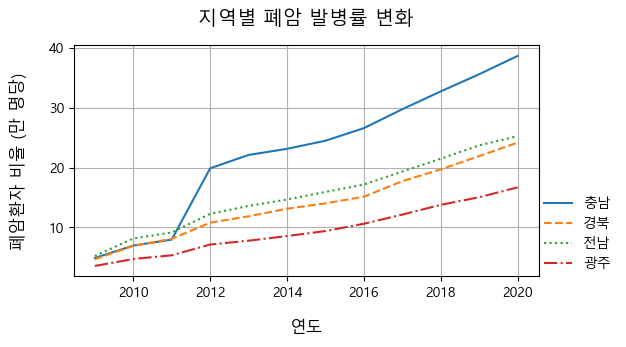

In [5]:
# 그래프 제목
plt.title('지역별 폐암 발병률 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# 지역별 미먼
plt.plot(data.groupby(['시도명']).get_group('충남')['연도'], data.groupby(['시도명']).get_group('충남')['폐암환자 비율']*10000, label='충남', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('경북')['연도'], data.groupby(['시도명']).get_group('경북')['폐암환자 비율']*10000, label='경북', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['폐암환자 비율']*10000, label='전남', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('광주')['연도'], data.groupby(['시도명']).get_group('광주')['폐암환자 비율']*10000, label='광주', linestyle='dashdot')

# 그리드 설정
plt.grid(True)

# 레이블 추가
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율 (만 명당)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 범례 표시
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)

plt.show()


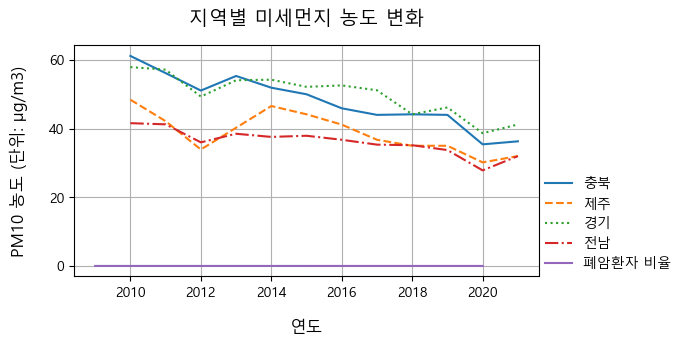

In [6]:
# y축 하나만 했을 때 폐암환자 비율은 보이지도 않음

plt.title('지역별 미세먼지 농도 변화', fontsize=14, pad=15)
plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(data.groupby(['시도명']).get_group('충북')['연도'], data.groupby(['시도명']).get_group('충북')['PM10 농도'], label='충북', linestyle='solid')
plt.plot(data.groupby(['시도명']).get_group('제주')['연도'], data.groupby(['시도명']).get_group('제주')['PM10 농도'], label='제주', linestyle='dashed')
plt.plot(data.groupby(['시도명']).get_group('경기')['연도'], data.groupby(['시도명']).get_group('경기')['PM10 농도'], label='경기', linestyle='dotted')
plt.plot(data.groupby(['시도명']).get_group('전남')['연도'], data.groupby(['시도명']).get_group('전남')['PM10 농도'], label='전남', linestyle='dashdot')
# y축 하나만 했을 때 폐암환자 비율은 보이지도 않음
plt.plot(data.groupby(['시도명']).get_group('서울')['연도'], data.groupby(['시도명']).get_group('서울')['폐암환자 비율'], label='폐암환자 비율')
plt.grid(True)
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
plt.show()


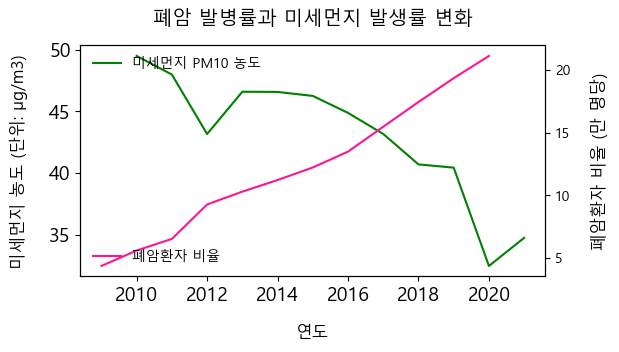

In [7]:
# 이중 축

# 한 그래프에 여러개 그릴거야
fig, ax1 = plt.subplots()

# 그래프 제목
plt.title('폐암 발병률과 미세먼지 발생률 변화', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# x 연도별 y 미세먼지 농도 그래프 먼저 그리고
ax1.plot(data['연도'].unique(), data.groupby(['연도'])['PM10 농도'].mean(), label='미세먼지 PM10 농도', color='green')
ax1.set_xlabel('연도', fontsize=12, labelpad=15)
ax1.set_ylabel('미세먼지 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
ax1.legend(loc='upper left', fontsize=10, frameon=False)

# ax1과 x축을 공유하는 새로운 Axes 객체 생성
ax2 = ax1.twinx()

# y폐암환자 비율 그래프 추가
ax2.plot(data['연도'].unique(), data.groupby(['연도'])['폐암환자 비율'].mean()*10000, label='폐암환자 비율', color='deeppink')
ax2.set_ylabel('폐암환자 비율 (만 명당)', fontsize=12, labelpad=15)
ax2.legend(loc='lower left', fontsize=10, frameon=False)


# 숫자크기 조정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

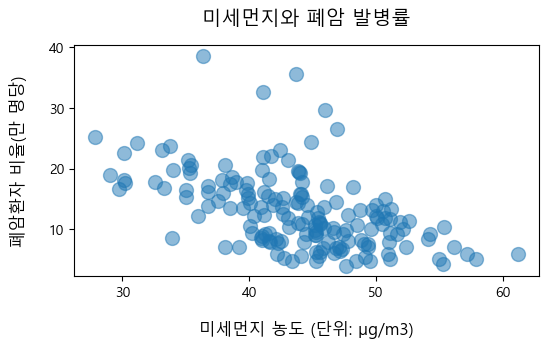

In [8]:
# 색깔 바꾸고 싶어!!!!!!!!!!!!!!

# 그래프 제목
plt.title('미세먼지와 폐암 발병률', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

plt.scatter(data['PM10 농도'], data['폐암환자 비율']*10000, s=100, alpha=0.5)

# 레이블
plt.xlabel('미세먼지 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율(만 명당)', fontsize=12, labelpad=15)

# 숫자크기?! 조정 ㅋㅋㅋㅋ
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


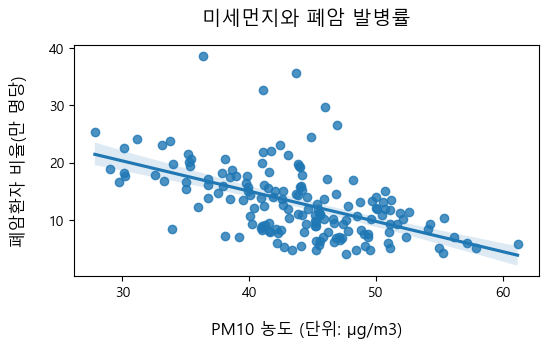

In [9]:

plt.title('미세먼지와 폐암 발병률', fontsize=14, pad=15)

a = sns.regplot(x = data['PM10 농도'], y = data['폐암환자 비율']*10000, data = data)

plt.xlabel('PM10 농도 (단위: μg/m3)', fontsize=12, labelpad=15)
plt.ylabel('폐암환자 비율(만 명당)', fontsize=12, labelpad=15)

# 숫자크기
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()